# Imports and Data Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#October 1 is the last regular season game day for both 2017 and 2018 (tbu in feature engineering)

In [2]:
df = pd.read_csv("Business Case Data 2017-2018 - Giants.csv")

In [3]:
df.head(5)
#Reads Clean

,description,event_datetime,visiting_team,home_team_score,visiting_team_score,promotion,zone_name,section_name,number_of_transactions,number_of_tickets
0,San Francisco Giants vs. Arizona Diamondbacks,4/10/17 1:35 PM,Arizona Diamondbacks,4.0,1.0,NaN,Club Baselines,230,2,4.0
1,San Francisco Giants vs. Arizona Diamondbacks,4/10/17 1:35 PM,Arizona Diamondbacks,4.0,1.0,NaN,Club Baselines,CL229,1,2.0
2,San Francisco Giants vs. Arizona Diamondbacks,4/10/17 1:35 PM,Arizona Diamondbacks,4.0,1.0,NaN,Club Baselines,Club Level Outfield 202,16,33.0
3,San Francisco Giants vs. Arizona Diamondbacks,4/10/17 1:35 PM,Arizona Diamondbacks,4.0,1.0,NaN,Club Baselines,Club Level Outfield 203,17,49.0
4,San Francisco Giants vs. Arizona Diamondbacks,4/10/17 1:35 PM,Arizona Diamondbacks,4.0,1.0,NaN,Club Baselines,Club Level Outfield 204,21,41.0


# EDA/Data Cleaning

In [4]:
#this block ads a unique ID for every game without messing up rows from the same game by using specific times
# convert the date column to datetime format
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

# create a new column with the rank of each date
min_rank = df['event_datetime'].rank(method='dense').min()
df['id'] = (df['event_datetime'].rank(method='dense') - min_rank + 1).astype(int)


In [5]:
df['id'].nunique()

164

In [6]:
df['event_datetime'].nunique()
#sanity check

164

In [7]:
df.shape

(5604, 11)

In [8]:
df.info()
#lots of NaN's on 'promotion', some missing on number of tickets and home/away scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   description             5604 non-null   object        
 1   event_datetime          5604 non-null   datetime64[ns]
 2   visiting_team           5604 non-null   object        
 3   home_team_score         5480 non-null   float64       
 4   visiting_team_score     5480 non-null   float64       
 5   promotion               1274 non-null   object        
 6   zone_name               5604 non-null   object        
 7   section_name            5604 non-null   object        
 8   number_of_transactions  5604 non-null   int64         
 9   number_of_tickets       5548 non-null   float64       
 10  id                      5604 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 481.7+ KB


In [9]:
df['promotion'].nunique()

31

In [10]:
df['promotion'] = df['promotion'].fillna('no_promo')
#adds 'no promo' to games where promotion was blank (most games will not have a promotion tied )

In [11]:
df['promotion'].value_counts()
#Most promotions had one game (30-40 rows)

no_promo                                                     4330
Exhibition                                                    124
Say Hey Tuesdays � 2 for 1 Giant Dogs till 7th Inning          93
Happy Hour Mondays - $6 Large Domestic Beers till 7:00 pm      60
Barry Bonds Jersey Retirement                                  40
Calendar                                                       40
Expressions Of Madison Bumgarner T-shirt                       38
Willie Mays Bobblehead                                         37
Rescheduled from April 6                                       37
Willie McCovey Bobblehead                                      37
Blanket                                                        36
Crazy Crab Scarf                                               36
Dodgers/Giants Rivalry Pin                                     36
Fireworks                                                      36
Two Flaps Down Hat                                             36
Heat React

In [12]:
df['id'].value_counts(ascending = True)
#rows/game range is 25-64

148    25
161    28
154    28
89     28
100    28
       ..
1      39
142    40
84     40
83     60
82     64
Name: id, Length: 164, dtype: int64

In [13]:
df['id'].value_counts(ascending = True).mean()
#two potential upper bound outliers in the above (60,64) but this is the average # of rows/game

34.170731707317074

In [14]:
df['id'].value_counts(ascending = True).median()
#sanity checking measure of central tendency 

35.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   description             5604 non-null   object        
 1   event_datetime          5604 non-null   datetime64[ns]
 2   visiting_team           5604 non-null   object        
 3   home_team_score         5480 non-null   float64       
 4   visiting_team_score     5480 non-null   float64       
 5   promotion               5604 non-null   object        
 6   zone_name               5604 non-null   object        
 7   section_name            5604 non-null   object        
 8   number_of_transactions  5604 non-null   int64         
 9   number_of_tickets       5548 non-null   float64       
 10  id                      5604 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 481.7+ KB


In [16]:
#only 56 missing rows (1-2 games) of 5604 for # of tickets, wont miss out on too large of data share from dropping
df = df.dropna(subset=['number_of_tickets'])
#only 124 (~4 games) missing rows of 5604 for # of tickets, wont miss out on too large of data share from dropping
df = df.dropna(subset=['home_team_score'])
df = df.dropna(subset=['visiting_team_score'])


In [17]:
df.info()
#All NaN's accounted for

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   description             5424 non-null   object        
 1   event_datetime          5424 non-null   datetime64[ns]
 2   visiting_team           5424 non-null   object        
 3   home_team_score         5424 non-null   float64       
 4   visiting_team_score     5424 non-null   float64       
 5   promotion               5424 non-null   object        
 6   zone_name               5424 non-null   object        
 7   section_name            5424 non-null   object        
 8   number_of_transactions  5424 non-null   int64         
 9   number_of_tickets       5424 non-null   float64       
 10  id                      5424 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 508.5+ KB


In [18]:
df['promotion'].value_counts()

no_promo                                                     4290
Say Hey Tuesdays � 2 for 1 Giant Dogs till 7th Inning          89
Happy Hour Mondays - $6 Large Domestic Beers till 7:00 pm      57
Calendar                                                       40
Barry Bonds Jersey Retirement                                  39
Rescheduled from April 6                                       37
Willie Mays Bobblehead                                         37
Expressions Of Madison Bumgarner T-shirt                       36
Two Flaps Down Hat                                             36
Blanket                                                        36
Willie McCovey Bobblehead                                      36
Dodgers/Giants Rivalry Pin                                     36
Crazy Crab Scarf                                               36
Heat Reactive/Color Changing Mug                               35
Camo Cap                                                       35
Cutch22 T-

In [19]:
df['total_ticket_sum'] = df.groupby('id')['number_of_tickets'].transform('sum').astype(int)
#combines all sections to find total number of tickets sold/game, this will be what we try to predict

# Feature Engineering

In [20]:
#FE to determine season/regular or playoffs
#assuming a jump from regular season to playoff baseball

# define a custom function to classify dates as "postseason" or "regseason"
def classify_season(date_str):
    date_obj = pd.to_datetime(date_str)
    if date_obj >= pd.to_datetime('10/2/17'):
        return 'postseason'
    else:
        return 'regseason'

# create a new column in the dataframe based on the result of the reg/post season finder
df['reg_or_post'] = df['event_datetime'].apply(classify_season)

df['reg_or_post'].value_counts()

regseason     2791
postseason    2633
Name: reg_or_post, dtype: int64

In [21]:
#worth keeping as there is a healthy split between reg & post season

In [22]:
#FE to determine if the opponent is a divisional opponent
def check_division_opponent(team):
    division_opponents = ['Arizona Diamondbacks', 'Colorado Rockies', 'San Diego Padres', 'Los Angeles Dodgers']
    if team in division_opponents:
        return 'yes'
    else:
        return 'no'

# apply the function to create a new column
df['division_opponent'] = df['visiting_team'].apply(check_division_opponent)
df['division_opponent'].value_counts()

no     2918
yes    2506
Name: division_opponent, dtype: int64

In [23]:
#worth keeping as there is a healthy split between div & non div (as expected)

In [24]:
#FE to determine which bucket of game time each game is in
df['time_of_day'] = pd.cut(df['event_datetime'].dt.hour, bins=[0, 12, 17, 24], 
labels=['morning', 'afternoon', 'evening'])
df['time_of_day'].value_counts()

evening      3235
afternoon    1509
morning       680
Name: time_of_day, dtype: int64

In [25]:
#worth keeping as there is a healthy split- may need to stratify on morning if the model gets weird in preprocessing

In [26]:
#FE to determine day of week
df['day_of_week'] = df['event_datetime'].dt.day_name()
df['day_of_week'].value_counts()

Saturday     956
Sunday       896
Friday       867
Wednesday    798
Tuesday      793
Monday       681
Thursday     433
Name: day_of_week, dtype: int64

In [27]:
#worth keeping as there is a healthy split between all days- Th may be under represented

In [28]:
#FE to determine season 
#feature engineering to create a seasons column
def get_season(month, day):
    if (month == 12 and day >= 21) or (month <= 3 and day <= 20):
        return 'winter'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'fall'
    else:
        return 'spring'

# create a new column that maps each date to its corresponding season
df['season'] = df['event_datetime'].apply(lambda x: get_season(x.month, x.day))
df['season'].value_counts()

summer    2794
spring    1716
fall       914
Name: season, dtype: int64

In [29]:
#makes sense in line with baseball season- I don't expect this to have a ton of sway as weather is beautiful in SF

In [30]:
df.head(5)
#check to make sure it looks right and has me FE columns

,description,event_datetime,visiting_team,home_team_score,visiting_team_score,promotion,zone_name,section_name,number_of_transactions,number_of_tickets,id,total_ticket_sum,reg_or_post,division_opponent,time_of_day,day_of_week,season
0,San Francisco Giants vs. Arizona Diamondbacks,2017-04-10 13:35:00,Arizona Diamondbacks,4.0,1.0,no_promo,Club Baselines,230,2,4.0,1,3334,regseason,yes,afternoon,Monday,spring
1,San Francisco Giants vs. Arizona Diamondbacks,2017-04-10 13:35:00,Arizona Diamondbacks,4.0,1.0,no_promo,Club Baselines,CL229,1,2.0,1,3334,regseason,yes,afternoon,Monday,spring
2,San Francisco Giants vs. Arizona Diamondbacks,2017-04-10 13:35:00,Arizona Diamondbacks,4.0,1.0,no_promo,Club Baselines,Club Level Outfield 202,16,33.0,1,3334,regseason,yes,afternoon,Monday,spring
3,San Francisco Giants vs. Arizona Diamondbacks,2017-04-10 13:35:00,Arizona Diamondbacks,4.0,1.0,no_promo,Club Baselines,Club Level Outfield 203,17,49.0,1,3334,regseason,yes,afternoon,Monday,spring
4,San Francisco Giants vs. Arizona Diamondbacks,2017-04-10 13:35:00,Arizona Diamondbacks,4.0,1.0,no_promo,Club Baselines,Club Level Outfield 204,21,41.0,1,3334,regseason,yes,afternoon,Monday,spring


# Corr Mapping

In [31]:
model_df = df.copy()

In [32]:
corr = model_df.corr()
# round the correlation coefficients to 3 decimal places
corr = corr.round(3)
corr

,home_team_score,visiting_team_score,number_of_transactions,number_of_tickets,id,total_ticket_sum
home_team_score,1.000,0.142,0.027,0.035,-0.026,0.090
visiting_team_score,0.142,1.000,0.033,0.037,-0.006,0.107
number_of_transactions,0.027,0.033,1.000,0.961,-0.084,0.344
number_of_tickets,0.035,0.037,0.961,1.000,-0.151,0.356
id,-0.026,-0.006,-0.084,-0.151,1.000,-0.419
total_ticket_sum,0.090,0.107,0.344,0.356,-0.419,1.000


In [33]:
len(model_df['id'].value_counts())
#we have 162 games, 1-indexed

162

In [34]:
model_df.head(1)

,description,event_datetime,visiting_team,home_team_score,visiting_team_score,promotion,zone_name,section_name,number_of_transactions,number_of_tickets,id,total_ticket_sum,reg_or_post,division_opponent,time_of_day,day_of_week,season
0,San Francisco Giants vs. Arizona Diamondbacks,2017-04-10 13:35:00,Arizona Diamondbacks,4.0,1.0,no_promo,Club Baselines,230,2,4.0,1,3334,regseason,yes,afternoon,Monday,spring


# ML Preprocessing

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

# Define the game IDs and target variable
game_ids = model_df['id']
target = model_df['total_ticket_sum']

# Define the column transformer for preprocessing
num_cols = ['number_of_transactions', 'home_team_score', 'visiting_team_score']
cat_cols = ['visiting_team', 'promotion', 'zone_name', 'reg_or_post', 'season', 'division_opponent', 
'day_of_week', 'time_of_day', 'section_name']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Use GroupShuffleSplit to split the data by game ID
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X=model_df, y=target, groups=game_ids))

# Split the data into train and test sets
X_train = model_df.iloc[train_idx].drop('total_ticket_sum', axis=1)
X_test = model_df.iloc[test_idx].drop('total_ticket_sum', axis=1)
y_train = target.iloc[train_idx]
y_test = target.iloc[test_idx]

# Preprocess the data using the pipeline
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = lr_model.predict(X_test)

# Compute the R-squared score
lr_r2 = r2_score(y_test, y_pred)

print("R-squared score:", lr_r2)

R-squared score: 0.4724999829695885


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate the R-squared score
rf_r2_score = rf_model.score(X_test, y_test)

# Print the R-squared score
print("R-squared score:", rf_r2_score)


R-squared score: 0.6640040545005345


In [38]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 11.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [39]:
from xgboost import XGBRegressor

# Define the XGBoost regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model using R-squared
xgb_r2 = xgb_model.score(X_test, y_test)

print("XGBoost Regressor R-squared:", xgb_r2)

XGBoost Regressor R-squared: 0.59220258581396


In [40]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 115.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [41]:
#Winner winner chicken dinner
import lightgbm as lgb

# Define the dataset
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test)

# Define the hyperparameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'n_jobs': -1
}

# Train the model
num_rounds = 10000
lgb_model = lgb.train(params,
                  lgb_train,
                  num_rounds,
                  valid_sets=[lgb_train, lgb_valid],
                  early_stopping_rounds=100,
                  verbose_eval=10)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Calculate R-squared score
from sklearn.metrics import r2_score
lgb_r2 = r2_score(y_test, y_pred)
print("R-squared score:", lgb_r2)

#PERCENTILE STUFF (this was the best model by a long shot even compared to an ensemble)
#Calculate the 5th and 95th percentiles of the predicted attendance
lower_bound = np.percentile(y_pred, 5)
upper_bound = np.percentile(y_pred, 95)

print("The 5th percentile of predicted attendance is:", lower_bound)
print("The 95th percentile of predicted attendance is:", upper_bound)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[10]	training's rmse: 554.892	valid_1's rmse: 629.048
[20]	training's rmse: 363.784	valid_1's rmse: 529.426
[30]	training's rmse: 247.681	valid_1's rmse: 483.885
/root/venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/root/venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluatio

In [42]:
# Define the weights for each model
weights = {
    'linear_regression': 0.1,
    'random_forest': 0.2,
    'xgboost': 0.2,
    'lightgbm': 0.5
}

# Make predictions using each model
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)

# Combine the predictions using weighted averaging
final_pred = (weights['linear_regression'] * lr_pred) + \
             (weights['random_forest'] * rf_pred) + \
             (weights['xgboost'] * xgb_pred) + \
             (weights['lightgbm'] * lgb_pred)

# Evaluate the performance of the ensemble model
ensemble_r2 = r2_score(y_test, final_pred)
print("Ensemble R2 score:", ensemble_r2)
#this makes sense given the only half decent score was LGB and partially RF

Ensemble R2 score: 0.6975849478002378


# Creating a Visualization for Actual vs. Predicted Ticket Totals

In [43]:
# Using LGB Model to make an actual vs. predicted scatterplot
predictions = pd.DataFrame(lgb_model.predict(X_test))
predictions['predicted'] = "Predicted"

In [44]:
y_test_new = pd.DataFrame(y_test.copy())
y_test_new['predicted'] = "Actual"

In [45]:
pred_vs_actual = pd.concat([y_test_new, predictions.rename(columns={0: 'total_ticket_sum'})], axis=0)
pred_vs_actual.head(5)

,total_ticket_sum,predicted
319,2528.0,Actual
320,2528.0,Actual
321,2528.0,Actual
322,2528.0,Actual
323,2528.0,Actual


Text(0.5, 1.0, 'Actual vs. Predicted Scatterplot for LightGBM Model (Highest R^2)')

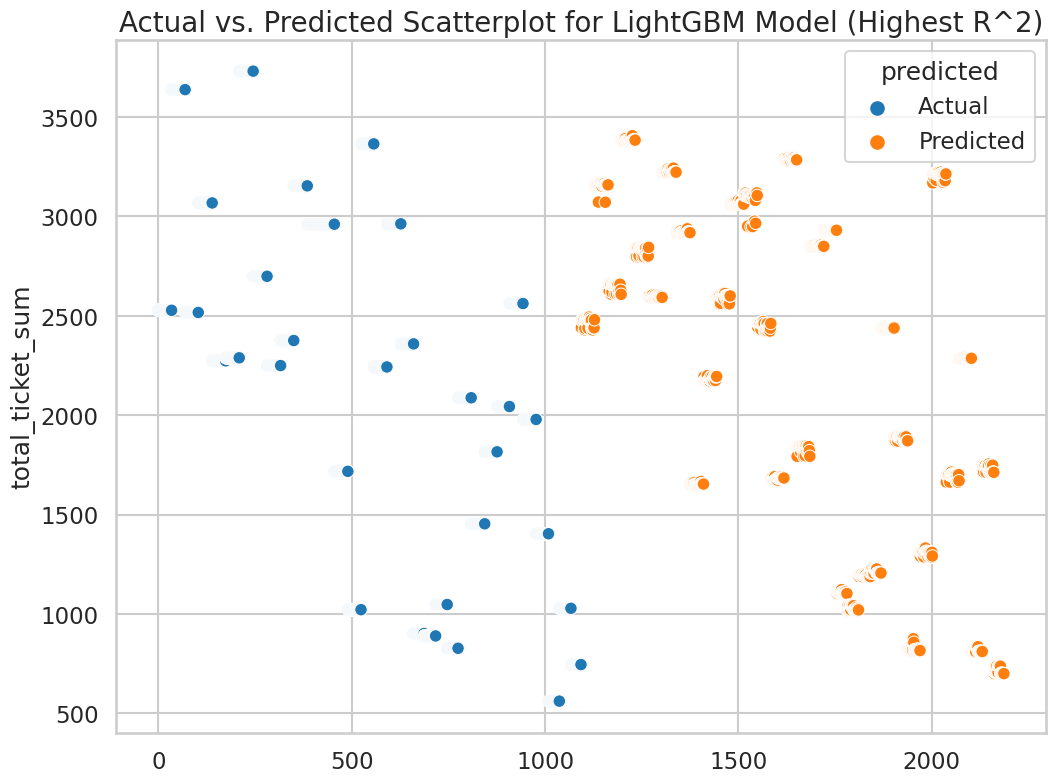

In [46]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_theme(style='whitegrid', palette='tab10', context='talk')
sns.scatterplot(data=pred_vs_actual.reset_index(drop=True), 
                x=pred_vs_actual.reset_index(drop=True).index, 
                y='total_ticket_sum', hue='predicted').set_title('Actual vs. Predicted Scatterplot for LightGBM Model (Highest R^2)', fontdict = {'fontsize': 20})

Text(0.5, 1.0, 'Actual vs. Predicted Histogram for LightGBM Model (Highest R^2)')

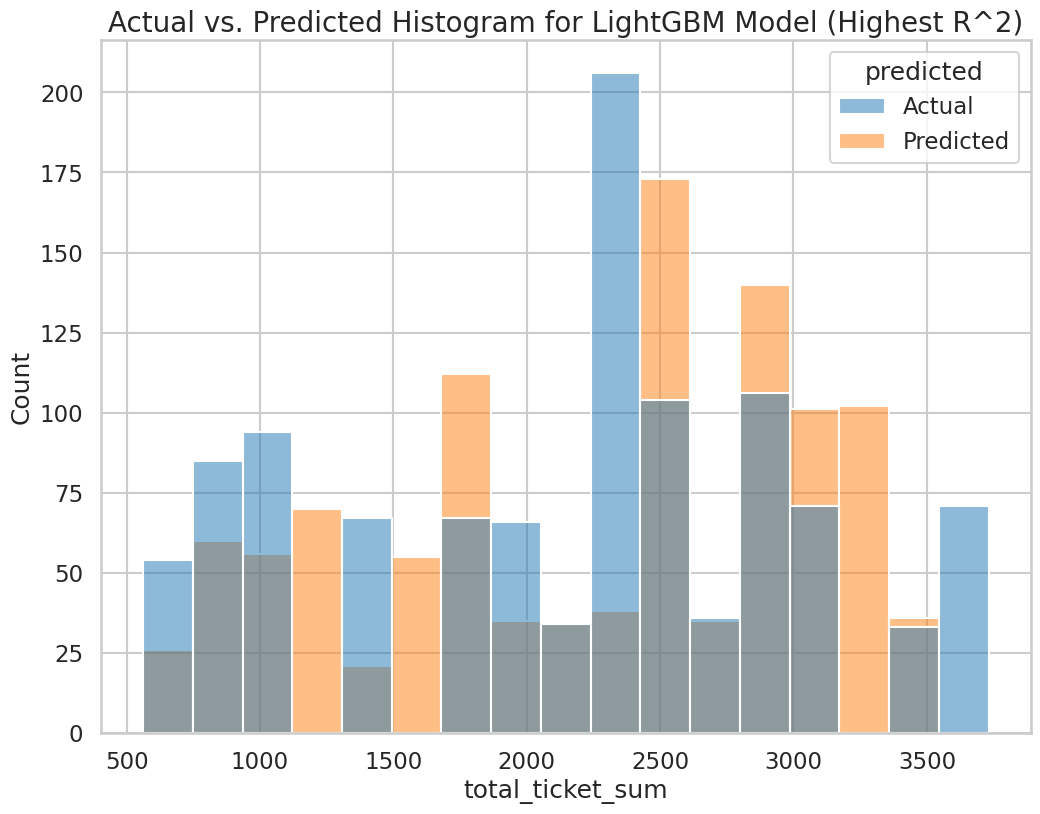

In [47]:
sns.histplot(data=pred_vs_actual, x="total_ticket_sum",hue="predicted").set_title('Actual vs. Predicted Histogram for LightGBM Model (Highest R^2)', fontdict = { 'fontsize': 20})

# Promotion EDA

In [48]:
df['promotion'].nunique()

31

In [49]:
df['promotion'].value_counts()

no_promo                                                     4290
Say Hey Tuesdays � 2 for 1 Giant Dogs till 7th Inning          89
Happy Hour Mondays - $6 Large Domestic Beers till 7:00 pm      57
Calendar                                                       40
Barry Bonds Jersey Retirement                                  39
Rescheduled from April 6                                       37
Willie Mays Bobblehead                                         37
Expressions Of Madison Bumgarner T-shirt                       36
Two Flaps Down Hat                                             36
Blanket                                                        36
Willie McCovey Bobblehead                                      36
Dodgers/Giants Rivalry Pin                                     36
Crazy Crab Scarf                                               36
Heat Reactive/Color Changing Mug                               35
Camo Cap                                                       35
Cutch22 T-

In [50]:
promo_checks = df.drop_duplicates(subset= 'id', keep='first')

In [51]:
promo_checks.columns

Index(['description', 'event_datetime', 'visiting_team', 'home_team_score',
       'visiting_team_score', 'promotion', 'zone_name', 'section_name',
       'number_of_transactions', 'number_of_tickets', 'id', 'total_ticket_sum',
       'reg_or_post', 'division_opponent', 'time_of_day', 'day_of_week',
       'season'],
      dtype='object')

In [52]:
mean_total_ticket_sum_by_promotion = promo_checks.groupby('promotion')['total_ticket_sum'].mean().sort_values(ascending=False)
mean_total_ticket_sum_by_promotion

promotion
Rescheduled from April 6                                     4461.000000
Barry Bonds Jersey Retirement                                3468.000000
Cutch22 T-shirt Giveaway and Kid's Opening Day               3257.000000
Willie Mays Bobblehead                                       3109.000000
Calendar                                                     3079.000000
Snowglobe                                                    3033.000000
Dodgers/Giants Rivalry Pin                                   2963.000000
Blanket                                                      2926.000000
Hello Kitty Cap                                              2733.000000
Buster Posey Socks                                           2662.000000
Expressions Of Madison Bumgarner T-shirt                     2617.000000
Brandon Crawford Gnome                                       2602.000000
Two Flaps Down Hat                                           2593.000000
Willie McCovey Bobblehead                

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3762d963-42bd-4aec-b35c-ea45de0771ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>